In [1]:
from datetime import datetime
start_time = datetime.now()
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/markouskokovic/Desktop/Credit risk data.csv')

In [3]:
data.shape

(900, 9)

In [4]:
data.dtypes

Application ID       int64
Application Date    object
Channel             object
Amount Requested    object
Risk Class          object
Decision            object
Decision Code       object
Outcome             object
Revenue/ (Loss)     object
dtype: object

In [5]:
data.head(10)

,Application ID,Application Date,Channel,Amount Requested,Risk Class,Decision,Decision Code,Outcome,Revenue/ (Loss)
0,100000,12/1/10,Online,$500,N,Decline,D,NaN,
1,100001,12/1/10,Online,$300,N,Decline,D,NaN,
2,100002,12/1/10,Online,$500,B,Decline,D,NaN,
3,100003,12/1/10,Store,$500,B,Approve,S,Good = Pay,50
4,100004,12/1/10,Store,$500,N,Decline,D,NaN,
5,100005,12/1/10,Online,$300,J,Decline,D,NaN,
6,100006,12/1/10,Store,$500,B,Approve,S,Good = Pay,50
7,100007,12/1/10,Online,$500,N,Decline,D,NaN,
8,100008,12/1/10,Store,$500,B,Approve,S,Good = Pay,50
9,100009,12/1/10,Online,$200,J,Approve,S,Good = Pay,20


In [17]:
data['Revenue/ (Loss)'].unique()

array(['      ', '50', '20', '30', '-200', '-100', '-400', '-300'],
      dtype=object)

In [15]:
data['Revenue/ (Loss)'].value_counts()

          500
20        187
50        109
30         72
-400       16
-200        8
-100        5
-300        3
Name: Revenue/ (Loss), dtype: int64

In [19]:
data['Outcome'].value_counts()

Good = Pay       368
Bad = Default     32
Name: Outcome, dtype: int64

In [18]:
data.isna().sum()

Application ID        0
Application Date      0
Channel               0
Amount Requested      0
Risk Class            0
Decision              0
Decision Code         0
Outcome             500
Revenue/ (Loss)       0
dtype: int64

In [20]:
# data['Revenue/ (Loss)'].str.strip()
valid = '0123456789-.'
def clean(x):
    return(''.join(filter(lambda char: char in valid, x)))

data['Amount Requested'] = data['Amount Requested'].apply(clean).astype(float)

In [21]:
data['Revenue/ (Loss)'] = data['Revenue/ (Loss)'].apply(clean)
data['Revenue/ (Loss)'] = data['Revenue/ (Loss)'].apply(pd.to_numeric, errors='coerce')
data['Revenue/ (Loss)'] = data['Revenue/ (Loss)'].astype(float)
data.head(25)

,Application ID,Application Date,Channel,Amount Requested,Risk Class,Decision,Decision Code,Outcome,Revenue/ (Loss)
0,100000,12/1/10,Online,500.0,N,Decline,D,NaN,NaN
1,100001,12/1/10,Online,300.0,N,Decline,D,NaN,NaN
2,100002,12/1/10,Online,500.0,B,Decline,D,NaN,NaN
3,100003,12/1/10,Store,500.0,B,Approve,S,Good = Pay,50.0
4,100004,12/1/10,Store,500.0,N,Decline,D,NaN,NaN
5,100005,12/1/10,Online,300.0,J,Decline,D,NaN,NaN
6,100006,12/1/10,Store,500.0,B,Approve,S,Good = Pay,50.0
7,100007,12/1/10,Online,500.0,N,Decline,D,NaN,NaN
8,100008,12/1/10,Store,500.0,B,Approve,S,Good = Pay,50.0
9,100009,12/1/10,Online,200.0,J,Approve,S,Good = Pay,20.0


In [8]:
data.count()

Application ID      900
Application Date    900
Channel             900
Amount Requested    900
Risk Class          900
Decision            900
Decision Code       900
Outcome             400
Revenue/ (Loss)     400
dtype: int64

In [22]:
cols = data.columns.tolist()

In [23]:
for col in cols:
    print(col, '# unique values: ', len(data[col].unique()))

Application ID # unique values:  900
Application Date # unique values:  23
Channel # unique values:  2
Amount Requested # unique values:  3
Risk Class # unique values:  3
Decision # unique values:  2
Decision Code # unique values:  3
Outcome # unique values:  3
Revenue/ (Loss) # unique values:  8


In [24]:
# number of nonzero entries for each column
data.astype(bool).sum(axis=0)

Application ID      900
Application Date    900
Channel             900
Amount Requested    900
Risk Class          900
Decision            900
Decision Code       900
Outcome             900
Revenue/ (Loss)     900
dtype: int64

In [25]:
data.dtypes

Application ID        int64
Application Date     object
Channel              object
Amount Requested    float64
Risk Class           object
Decision             object
Decision Code        object
Outcome              object
Revenue/ (Loss)     float64
dtype: object

In [26]:
data.describe()

,Application ID,Amount Requested,Revenue/ (Loss)
count,900.000000,900.00000,400.00000
mean,100449.500000,386.00000,4.87500
std,259.951919,136.47232,95.02135
min,100000.000000,200.00000,-400.00000
25%,100224.750000,200.00000,20.00000
50%,100449.500000,500.00000,20.00000
75%,100674.250000,500.00000,50.00000
max,100899.000000,500.00000,50.00000


In [27]:
num_apps = len(data)
approved = data[data['Decision'] == 'Approve']
declined = data[data['Decision'] == 'Decline']

In [28]:
goods = approved[approved['Outcome'] == 'Good = Pay']
bads = approved[approved['Outcome'] == 'Bad = Default']
num_goods = len(goods)
num_bads = len(bads)

In [29]:
print('overall bad rate is {} percent'.format(100 * len(bads) / len(approved)))

overall bad rate is 8.0 percent


In [30]:
num_approved = len(approved)
num_declined = len(declined)
print('overall approval rate is {} percent'.format(100 * num_approved / (num_approved + num_declined)))

overall approval rate is 44.44444444444444 percent


In [31]:
num_online_approved = len(approved[approved['Channel'] == 'Online'])
num_online_declined = len(declined[declined['Channel'] == 'Online'])
num_store_approved = len(approved[approved['Channel'] == 'Store'])
num_store_declined = len(declined[declined['Channel'] == 'Store'])

In [32]:
num_online_goods = len(goods[goods['Channel'] == 'Online'])
num_online_bads = len(bads[bads['Channel'] == 'Online'])
num_store_goods = len(goods[goods['Channel'] == 'Store'])
num_store_bads = len(bads[bads['Channel'] == 'Store'])

In [33]:
num_N_approved = len(approved[approved['Risk Class'] == 'N'])
num_N_declined = len(declined[declined['Risk Class'] == 'N'])
num_B_approved = len(approved[approved['Risk Class'] == 'B'])
num_B_declined = len(declined[declined['Risk Class'] == 'B'])
num_J_approved = len(approved[approved['Risk Class'] == 'J'])
num_J_declined = len(declined[declined['Risk Class'] == 'J'])

In [34]:
num_N_goods = len(goods[goods['Risk Class'] == 'N'])
num_N_bads = len(bads[bads['Risk Class'] == 'N'])
num_B_goods = len(goods[goods['Risk Class'] == 'B'])
num_B_bads = len(bads[bads['Risk Class'] == 'B'])
num_J_goods = len(goods[goods['Risk Class'] == 'J'])
num_J_bads = len(bads[bads['Risk Class'] == 'J'])

In [35]:
print('# apps = ', num_apps)
print('# approved = ', num_approved)
print('# declined = ', num_declined)
print('# approved online = ', num_online_approved)
print('# declined online = ', num_online_declined)
print('# approved store = ', num_store_approved)
print('# declined store = ', num_store_declined)
print('# goods = ', num_goods)
print('# bads = ', num_bads)
print('# good online = ', num_online_goods)
print('# bad online = ', num_online_bads)
print('# good store = ', num_store_goods)
print('# bad store = ', num_store_bads)
print('# risk class N approved', num_N_approved)
print('# risk class B approved', num_B_approved)
print('# risk class J approved', num_J_approved)
print('# risk class N bad', num_N_bads)
print('# risk class B bad', num_B_bads)
print('# risk class J bad', num_J_bads)

# apps =  900
# approved =  400
# declined =  500
# approved online =  115
# declined online =  421
# approved store =  285
# declined store =  79
# goods =  368
# bads =  32
# good online =  106
# bad online =  9
# good store =  262
# bad store =  23
# risk class N approved 36
# risk class B approved 324
# risk class J approved 40
# risk class N bad 3
# risk class B bad 26
# risk class J bad 3


In [36]:
print('approve rate = ', 100 * num_approved / num_apps)
print('overall bad rate = ', 100 * num_bads / num_approved)

approve rate =  44.44444444444444
overall bad rate =  8.0


In [43]:
pd.crosstab(data['Channel'],data['Decision'])

Decision,Approve,Decline
Channel,,
Online,115,421
Store,285,79


In [44]:
pd.crosstab(data['Channel'],data['Decision']).apply(lambda r: r/r.sum(),axis=1)

Decision,Approve,Decline
Channel,,
Online,0.214552,0.785448
Store,0.782967,0.217033


In [45]:
pd.crosstab(approved['Channel'],data['Outcome']).apply(lambda r: r/r.sum(),axis=1)

Outcome,Bad = Default,Good = Pay
Channel,,
Online,0.078261,0.921739
Store,0.080702,0.919298


In [46]:
pd.crosstab(data['Risk Class'],data['Decision']).apply(lambda r: r/r.sum(),axis=1)

Decision,Approve,Decline
Risk Class,,
B,0.657201,0.342799
J,0.317460,0.682540
N,0.128114,0.871886


In [47]:
pd.crosstab(approved['Risk Class'],data['Outcome']).apply(lambda r: r/r.sum(),axis=1)

Outcome,Bad = Default,Good = Pay
Risk Class,,
B,0.080247,0.919753
J,0.075000,0.925000
N,0.083333,0.916667


In [525]:
pd.crosstab(data['Risk Class'],data['Revenue/ (Loss)'])

Revenue/ (Loss),-400.0,-300.0,-200.0,-100.0,0.0,20.0,30.0,50.0
Risk Class,,,,,,,,
B,16,3,7,0,169,123,66,109
J,0,0,1,2,86,31,6,0
N,0,0,0,3,245,33,0,0


In [526]:
pd.crosstab(data['Decision Code'],data['Revenue/ (Loss)'])

Revenue/ (Loss),-400.0,-300.0,-200.0,-100.0,0.0,20.0,30.0,50.0
Decision Code,,,,,,,,
D,0,0,0,0,500,0,0,0
S,16,0,0,5,0,53,0,109
U,0,3,8,0,0,134,72,0


In [523]:
50 * 109 + 30 * 66 + 123 * 20 - 16 * 400 - 900 - 1400

1190

In [29]:
print('duration: ', datetime.now() - start_time)

duration:  0:00:02.732943


In [59]:
data.head(25)

,Application ID,Application Date,Channel,Amount Requested,Risk Class,Decision,Decision Code,Outcome,Revenue/ (Loss)
0,100000,12/1/10,Online,500.0,N,Decline,D,Declined,0.0
1,100001,12/1/10,Online,300.0,N,Decline,D,Declined,0.0
2,100002,12/1/10,Online,500.0,B,Decline,D,Declined,0.0
3,100003,12/1/10,Store,500.0,B,Approve,S,Good = Pay,50.0
4,100004,12/1/10,Store,500.0,N,Decline,D,Declined,0.0
5,100005,12/1/10,Online,300.0,J,Decline,D,Declined,0.0
6,100006,12/1/10,Store,500.0,B,Approve,S,Good = Pay,50.0
7,100007,12/1/10,Online,500.0,N,Decline,D,Declined,0.0
8,100008,12/1/10,Store,500.0,B,Approve,S,Good = Pay,50.0
9,100009,12/1/10,Online,200.0,J,Approve,S,Good = Pay,20.0


In [544]:
data[data['Decision Code'] == 'U']

,Application ID,Application Date,Channel,Amount Requested,Risk Class,Decision,Decision Code,Outcome,Revenue/ (Loss)
11,100011,12/1/10,Online,300.0,B,Approve,U,Good = Pay,30.0
14,100014,12/1/10,Online,200.0,B,Approve,U,Good = Pay,20.0
16,100016,12/1/10,Online,300.0,B,Approve,U,Good = Pay,30.0
17,100017,12/2/10,Online,200.0,B,Approve,U,Good = Pay,20.0
18,100018,12/2/10,Store,200.0,B,Approve,U,Good = Pay,20.0
...,...,...,...,...,...,...,...,...,...
827,100827,12/29/10,Store,300.0,B,Approve,U,Good = Pay,30.0
830,100830,12/29/10,Store,200.0,B,Approve,U,Good = Pay,20.0
831,100831,12/29/10,Online,200.0,B,Approve,U,Good = Pay,20.0
832,100832,12/29/10,Store,300.0,B,Approve,U,Good = Pay,30.0


In [58]:
# fill the NA values in Decision Code and Revenue / Loss columns

data.Outcome = data.Outcome.fillna('Declined')
data['Revenue/ (Loss)'] = data['Revenue/ (Loss)'].fillna(0)

In [49]:
from pandas_profiling import ProfileReport

In [51]:
report = ProfileReport(data, minimal = True)
report

## Dealing with categorical data

- If a cat column has only 2 unique value --> label encoder
- If a cat column has > 2 unique values --> one hot encoding

In [93]:
data2 = data.copy()

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [68]:
# label_encoder = LabelEncoder()

# for col in columns_2_val:
#     data1[col] = label_encoder.fit_transform(data1[col])

In [101]:
# Create a label encoder object
label_encoder = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data2:
    if data2[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data2[col].unique())) <= 2:
            # Train on the training data
            label_encoder.fit(data2[col])
            # Transform both training and testing data
            data2[col] = label_encoder.transform(data2[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [89]:
# one hot
one_hot_dummies = pd.get_dummies(data[['Decision Code', 'Risk Class', 'Outcome']])

In [90]:
one_hot_dummies

,Decision Code_D,Decision Code_S,Decision Code_U,Risk Class_B,Risk Class_J,Risk Class_N,Outcome_Bad = Default,Outcome_Declined,Outcome_Good = Pay
0,1,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
895,1,0,0,0,0,1,0,1,0
896,1,0,0,0,0,1,0,1,0
897,1,0,0,0,0,1,0,1,0
898,1,0,0,0,0,1,0,1,0


In [103]:
data_final = pd.concat([data2, one_hot_dummies], axis=1)
data_final

,Application ID,Application Date,Channel,Amount Requested,Risk Class,Decision,Decision Code,Outcome,Revenue/ (Loss),Decision Code_D,Decision Code_S,Decision Code_U,Risk Class_B,Risk Class_J,Risk Class_N,Outcome_Bad = Default,Outcome_Declined,Outcome_Good = Pay
0,100000,12/1/10,0,500.0,N,1,D,Declined,0.0,1,0,0,0,0,1,0,1,0
1,100001,12/1/10,0,300.0,N,1,D,Declined,0.0,1,0,0,0,0,1,0,1,0
2,100002,12/1/10,0,500.0,B,1,D,Declined,0.0,1,0,0,1,0,0,0,1,0
3,100003,12/1/10,1,500.0,B,0,S,Good = Pay,50.0,0,1,0,1,0,0,0,0,1
4,100004,12/1/10,1,500.0,N,1,D,Declined,0.0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,100895,12/30/10,0,200.0,N,1,D,Declined,0.0,1,0,0,0,0,1,0,1,0
896,100896,12/30/10,0,200.0,N,1,D,Declined,0.0,1,0,0,0,0,1,0,1,0
897,100897,12/30/10,0,200.0,N,1,D,Declined,0.0,1,0,0,0,0,1,0,1,0
898,100898,12/30/10,0,200.0,N,1,D,Declined,0.0,1,0,0,0,0,1,0,1,0


In [125]:
# drop columns that we do not need anymore
data_final = data_final.drop(['Decision Code', 'Risk Class', 'Outcome'], axis = 1)

In [126]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Application ID         900 non-null    int64  
 1   Application Date       900 non-null    object 
 2   Channel                900 non-null    int64  
 3   Amount Requested       900 non-null    float64
 4   Decision               900 non-null    int64  
 5   Revenue/ (Loss)        900 non-null    float64
 6   Decision Code_D        900 non-null    uint8  
 7   Decision Code_S        900 non-null    uint8  
 8   Decision Code_U        900 non-null    uint8  
 9   Risk Class_B           900 non-null    uint8  
 10  Risk Class_J           900 non-null    uint8  
 11  Risk Class_N           900 non-null    uint8  
 12  Outcome_Bad = Default  900 non-null    uint8  
 13  Outcome_Declined       900 non-null    uint8  
 14  Outcome_Good = Pay     900 non-null    uint8  
dtypes: flo

## Since we are predicting:

- Revenue / Loss
- Who goes bad

## we will keep only those customers who were approved for a credit

In [244]:
data_final_2 = data_final[data_final['Outcome_Declined'] == 0]

In [245]:
data_final_2 = data_final_2.drop(['Outcome_Declined', 'Decision', 'Decision Code_D'], axis = 1)
data_final_2.head()

,Application ID,Application Date,Channel,Amount Requested,Revenue/ (Loss),Decision Code_S,Decision Code_U,Risk Class_B,Risk Class_J,Risk Class_N,Outcome_Bad = Default,Outcome_Good = Pay
3,100003,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
6,100006,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
8,100008,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
9,100009,12/1/10,0,200.0,20.0,1,0,0,1,0,0,1
11,100011,12/1/10,0,300.0,30.0,0,1,1,0,0,0,1


In [546]:
data_final_2.head(10)

,Application ID,Application Date,Channel,Amount Requested,Revenue/ (Loss),Decision Code_S,Decision Code_U,Risk Class_B,Risk Class_J,Risk Class_N,Outcome_Bad = Default,Outcome_Good = Pay
3,100003,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
6,100006,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
8,100008,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
9,100009,12/1/10,0,200.0,20.0,1,0,0,1,0,0,1
11,100011,12/1/10,0,300.0,30.0,0,1,1,0,0,0,1
14,100014,12/1/10,0,200.0,20.0,0,1,1,0,0,0,1
15,100015,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
16,100016,12/1/10,0,300.0,30.0,0,1,1,0,0,0,1
17,100017,12/2/10,0,200.0,20.0,0,1,1,0,0,0,1
18,100018,12/2/10,1,200.0,20.0,0,1,1,0,0,0,1


In [247]:
data_final_2.shape

(400, 12)

# Modeling

- Part 1 - Regression --> predict revenue/loss
- Part 2 - Classification --> Predict who goes bad

### Part 1 -  Regression --> predict revenue/loss

In [563]:
# X and y

X = data_final_2.iloc[:, 2:]
X = X.drop('Revenue/ (Loss)', axis = 1)


y = data_final_2['Revenue/ (Loss)']

In [564]:
X

,Channel,Amount Requested,Decision Code_S,Decision Code_U,Risk Class_B,Risk Class_J,Risk Class_N,Outcome_Bad = Default,Outcome_Good = Pay
3,1,500.0,1,0,1,0,0,0,1
6,1,500.0,1,0,1,0,0,0,1
8,1,500.0,1,0,1,0,0,0,1
9,0,200.0,1,0,0,1,0,0,1
11,0,300.0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
838,0,300.0,0,1,1,0,0,0,1
839,1,500.0,1,0,1,0,0,0,1
844,1,500.0,1,0,1,0,0,1,0
846,0,200.0,1,0,0,1,0,0,1


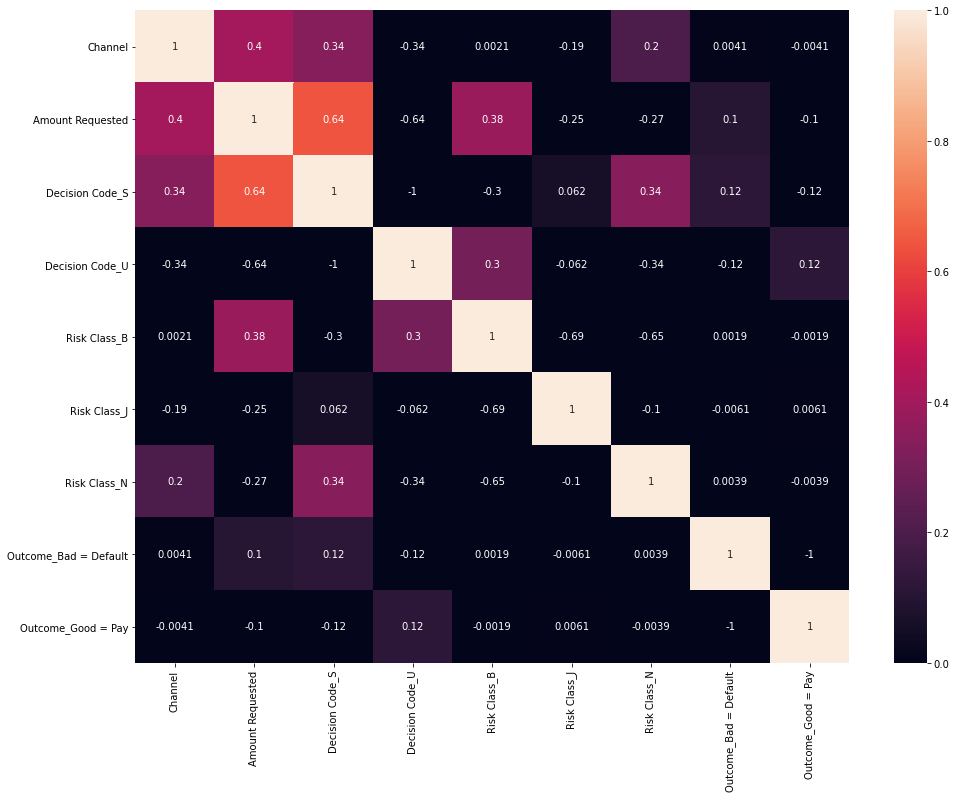

In [249]:
# corr

import seaborn as sns

a = X.corr()

plt.figure(figsize = (16,12))

sns.heatmap(a, vmin=0, vmax=1,
           annot=True)

plt.show()

In [565]:
from sklearn import linear_model
import statsmodels.api as sm

In [566]:
# OLS

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 -132.39332233095536
Coefficients: 
 [-6.43739022e+00  2.88473171e-02  1.29070704e+00 -1.29070704e+00
 -5.85598269e+00  1.61412605e-01  5.69457008e+00 -1.63291166e+02
  1.63291166e+02]


In [567]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Revenue/ (Loss)   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     414.6
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          1.48e-166
Time:                        23:13:20   Log-Likelihood:                -1990.3
No. Observations:                 400   AIC:                             3995.
Df Residuals:                     393   BIC:                             4023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -56.74

In [568]:
# drop columns where p > 0.05

X1 = X.drop(['Amount Requested', 'Channel'], axis = 1)

X1 = sm.add_constant(X1) # adding a constant
 
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Revenue/ (Loss)   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     621.5
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          6.43e-169
Time:                        23:13:39   Log-Likelihood:                -1991.3
No. Observations:                 400   AIC:                             3993.
Df Residuals:                     395   BIC:                             4013.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -55.84

In [254]:
# LinearRegression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1, y)


some_data = X1.iloc[:5]
some_labels = y.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data))

print("Labels:\t\t", list(some_labels))

Predictions:	 [34.32376056 34.32376056 34.32376056 37.74249674 27.03307334]
Labels:		 [50.0, 50.0, 50.0, 20.0, 30.0]


In [255]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X1)
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:\t\t", lin_rmse)

RMSE:		 35.1414437271396


In [256]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, predictions)
print("MAE:\t\t", lin_mae)

MAE:		 18.189229080565145


In [257]:
# RIDGE

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="auto", random_state=42)
ridge_reg.fit(X1, y)
predictions = ridge_reg.predict(X1)

ridge_mse = mean_squared_error(y, predictions)
ridge_rmse = np.sqrt(ridge_mse)


# LASSO

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X1, y)
predictions = lasso_reg.predict(X1)

lasso_mse = mean_squared_error(y, predictions)
lasso_rmse = np.sqrt(lasso_mse)


# ELASTIC NET

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X1, y)
predictions = elastic_net.predict(X1)

elastic_net_mse = mean_squared_error(y, predictions)
elastic_net_rmse = np.sqrt(elastic_net_mse)

print("RIDGE RMSE:\t\t", ridge_rmse)
print("LASSO RMSE:\t\t", lasso_rmse)
print("ELASTIC NET RMSE:\t\t", elastic_net_rmse)

RIDGE RMSE:		 35.17305576157432
LASSO RMSE:		 35.14494923480365
ELASTIC NET RMSE:		 41.816177458111355


In [258]:
# Decision tree regressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X1, y)

predictions = tree_reg.predict(X1)
tree_mse = mean_squared_error(y, predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision tree regressor RMSE:\t\t", tree_rmse)

Decision tree regressor RMSE:		 8.013032102356096


In [259]:
# cross validatation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X1, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [260]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [13.3171547  13.3559424   6.27365821  3.96061278  3.41710217  3.65435714
  6.30696109 20.46851287  3.44564908  3.32780828]
Mean: 7.752775871623162
Standard deviation: 5.625239609048805


In [261]:
lin_scores = cross_val_score(lin_reg, X1, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [44.70199746 39.56834838 21.09945753 11.01172413 28.61345474 33.58429535
 51.21750822 30.11740369 44.62986787 53.14374365]
Mean: 35.76878010192836
Standard deviation: 12.76448229193302


In [262]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X1, y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [263]:
predictions = forest_reg.predict(X1)
forest_mse = mean_squared_error(y, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

8.483446094868944

In [264]:
# cross valid

forest_scores = cross_val_score(forest_reg, X1, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [14.13283092 13.3128534   6.28028614  3.95176288  3.39443254  5.99019015
 10.04910861 17.79538922  5.85098891  3.32555918]
Mean: 8.40834019572386
Standard deviation: 4.851638668707706


In [265]:
# SVM

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X1, y)
predictions = svm_reg.predict(X1)
svm_mse = mean_squared_error(y, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

83.7393208267727

In [266]:
# grid search

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X1, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [267]:
# best params
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 3}

In [268]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=3,
                      random_state=42)

In [269]:
# let's see the result for each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

10.826841396945206 {'max_features': 2, 'n_estimators': 3}
9.695848822649976 {'max_features': 2, 'n_estimators': 10}
9.308908549671337 {'max_features': 2, 'n_estimators': 30}
11.430441546534208 {'max_features': 4, 'n_estimators': 3}
9.251364075510384 {'max_features': 4, 'n_estimators': 10}
9.37677798495231 {'max_features': 4, 'n_estimators': 30}
14.321532638085287 {'max_features': 6, 'n_estimators': 3}
10.557697163704841 {'max_features': 6, 'n_estimators': 10}
10.154638951585724 {'max_features': 6, 'n_estimators': 30}
12.45416786075016 {'max_features': 8, 'n_estimators': 3}
9.77720798240037 {'max_features': 8, 'n_estimators': 10}
9.841251299123586 {'max_features': 8, 'n_estimators': 30}
8.599780459707585 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
8.91101472763719 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
9.528533919184312 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
8.664621399440797 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [270]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006794,0.001381,0.002265,0.000301,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-273.504413,-18.181364,...,-117.220495,96.565056,15,-60.919089,-82.502270,-147.901478,-56.686586,-79.313850,-85.464655,32.789105
1,0.012275,0.003458,0.002269,0.000239,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-177.617888,-25.592850,...,-94.009484,77.424756,10,-53.475727,-83.698431,-101.080724,-56.675816,-78.435400,-74.673220,17.698615
2,0.026522,0.000458,0.002927,0.000106,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-205.891601,-25.776704,...,-86.655778,79.253797,7,-45.857809,-79.332958,-91.734221,-59.048413,-77.747716,-70.744223,16.245128
3,0.004616,0.000134,0.001763,0.000135,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-384.615524,-18.181364,...,-130.654994,135.828118,16,-168.557978,-172.997062,-144.646270,-56.686586,-82.743206,-125.126220,46.987809
4,0.010347,0.000312,0.001948,0.000092,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-188.067888,-25.592850,...,-85.587737,75.719814,6,-51.786367,-83.584629,-84.114511,-67.475816,-83.144968,-74.021258,12.757798


In [271]:
# randomized grid search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X1, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb1c2edfd00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb1c2f73280>},
                   random_state=42, scoring='neg_mean_squared_error')

In [272]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

9.538430196862482 {'max_features': 7, 'n_estimators': 180}
9.46669409392511 {'max_features': 5, 'n_estimators': 15}
9.392670016781334 {'max_features': 3, 'n_estimators': 72}
9.351199043715187 {'max_features': 5, 'n_estimators': 21}
9.482492793899473 {'max_features': 7, 'n_estimators': 122}
9.364944851980248 {'max_features': 3, 'n_estimators': 75}
9.32510820601219 {'max_features': 3, 'n_estimators': 88}
9.356593697934562 {'max_features': 5, 'n_estimators': 100}
9.40697739975767 {'max_features': 3, 'n_estimators': 150}
12.70188342153891 {'max_features': 5, 'n_estimators': 2}


In [273]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.        , 0.01692527, 0.02893659, 0.07238811, 0.00141736,
       0.01315831, 0.57811624, 0.28905812])

In [274]:
names = X1.columns
names

Index(['const', 'Decision Code_S', 'Decision Code_U', 'Risk Class_B',
       'Risk Class_J', 'Risk Class_N', 'Outcome_Bad = Default',
       'Outcome_Good = Pay'],
      dtype='object')

In [275]:
f_i = sorted(zip(feature_importances, X1.columns), reverse = True)
pd.DataFrame(f_i, columns = ['f_i_score', 'variable'])

,f_i_score,variable
0,0.578116,Outcome_Bad = Default
1,0.289058,Outcome_Good = Pay
2,0.072388,Risk Class_B
3,0.028937,Decision Code_U
4,0.016925,Decision Code_S
5,0.013158,Risk Class_N
6,0.001417,Risk Class_J
7,0.000000,const


In [276]:
# final model

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X1)

final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

8.013032102356096

### We can compute a 95% confidence interval for the test RMSE:

In [277]:
from scipy import stats

In [278]:
confidence = 0.95
squared_errors = (final_predictions - y) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(4.624130049778155, 10.345761848675911)

### let's try some other models

In [477]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

In [478]:
def clf_score(clf, x_train, y_train, label, train_scores, test_scores, cv=10, n_jobs=-1):
    score = cross_validate(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=n_jobs,
                           return_train_score=True, return_estimator=True)
    train_scores.append(np.sqrt(-score['train_score']))
    test_scores.append(np.sqrt(-score['test_score']))
    labels.append(label)
    print(np.mean(score['test_score']))

In [479]:
def clf_score2(clf, x_train, y_train, label, train_scores, test_scores, cv=10, n_jobs=-1):
    score = cross_validate(clf, x_train, y_train, scoring="r2", cv=cv, n_jobs=n_jobs,
                           return_train_score=True, return_estimator=True)
    train_scores.append(score['train_score'])
    test_scores.append(score['test_score'])
    labels.append(label)
    print(np.mean(score['test_score']))

In [511]:
labels = []
train_scores = []
test_scores = []

In [512]:
# Random forest
rf = RandomForestRegressor(n_estimators=10,
                               max_features=5)  
clf_score(rf,  X1, y,  'RF', train_scores, test_scores, n_jobs=-1)

0.0


In [513]:
# Neural Network
nn = MLPRegressor(hidden_layer_sizes=(10),activation='tanh',solver='adam',
                      learning_rate='adaptive',max_iter=100,learning_rate_init=.01,alpha=.001)
clf_score(nn, X1, y, 'NN', train_scores, test_scores, n_jobs=-1)

-0.0006455072680423204


In [514]:
# Boosted tree
params = {'n_estimators': 10, 'max_depth':10, 'min_samples_split':2, 'learning_rate':.01, 
              'loss':'ls'}
bt = GradientBoostingRegressor(**params)
clf_score2(bt,  X1, y,  'BT', train_scores, test_scores, n_jobs=-1)

0.12634296101380987


In [518]:
# Adaboost
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=10,
                       learning_rate=.01)
clf_score(ada,  X1, y,  'Ada', train_scores, test_scores, n_jobs=-1)

0.0


In [517]:
cvscores = pd.DataFrame(test_scores, index=labels).mean(numeric_only=True, axis=1)
cvscores

RF     0.000000
NN     0.022727
BT     0.126343
Ada    0.000000
dtype: float64

# Part 2 - Classification --> Predict who goes bad

In [569]:
data_final_2.head(5)

,Application ID,Application Date,Channel,Amount Requested,Revenue/ (Loss),Decision Code_S,Decision Code_U,Risk Class_B,Risk Class_J,Risk Class_N,Outcome_Bad = Default,Outcome_Good = Pay
3,100003,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
6,100006,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
8,100008,12/1/10,1,500.0,50.0,1,0,1,0,0,0,1
9,100009,12/1/10,0,200.0,20.0,1,0,0,1,0,0,1
11,100011,12/1/10,0,300.0,30.0,0,1,1,0,0,0,1


In [289]:
data_final_2['Outcome_Bad = Default'].value_counts()

0    368
1     32
Name: Outcome_Bad = Default, dtype: int64

### We can see that data is imbalanced, but let's run the model first and later we will do SMOTE, oversampling

In [334]:
X = data_final_2.iloc[:, 2:10]
X = X.drop('Revenue/ (Loss)', axis = 1)
y = data_final_2['Outcome_Bad = Default']

In [335]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [336]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


### SMOTE

In [298]:
conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.0
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/markouskokovic/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.9.0-py38_0 --> conda-fo

In [300]:
import imblearn

In [337]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==1]))
# print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [338]:
# let's see now after SMOTE how data looks like

os_data_y.value_counts()

1    257
0    257
Name: Outcome_Bad = Default, dtype: int64

### Recursive Feature Elimination

In [339]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [379]:
# Cross val

from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg, X_train, y_train, cv=10, scoring="accuracy")
print('Cross val score:\t\t',score.mean())

/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Cross val score:		 0.705


/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/markouskokovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [341]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[32 46]
 [ 5 72]]


In [357]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.41      0.56        78
           1       0.61      0.94      0.74        77

    accuracy                           0.67       155
   macro avg       0.74      0.67      0.65       155
weighted avg       0.74      0.67      0.65       155



## Since we are trying to predict who goes bad, that means that we have already approved the loan.

## In that situation I would argue that if we predict that someone is going to default but they actually pay the loan back, we can live with that mistake, because at the end of the day they will pay us back. 
- Here we are talking about a PRECISION --> TP / (TP + FP)

## Precision is important but I believe in this situation we should care more about RECALL, because we really do not want to predict that someone will pay us back but eventually that customer defaults. For that reason the good news is that recall score is almost 0.94.


- In this situation we care more about Precision / Recall curve but we will also plot ROC AUC curve.

In [369]:
# Precision / Recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

print('Precision\t\t', precision_score(y_test, y_pred))
print('Recall\t\t', recall_score(y_test, y_pred))
print('F1\t\t', f1_score(y_test, y_pred))


Precision		 0.6101694915254238
Recall		 0.935064935064935
F1		 0.7384615384615384


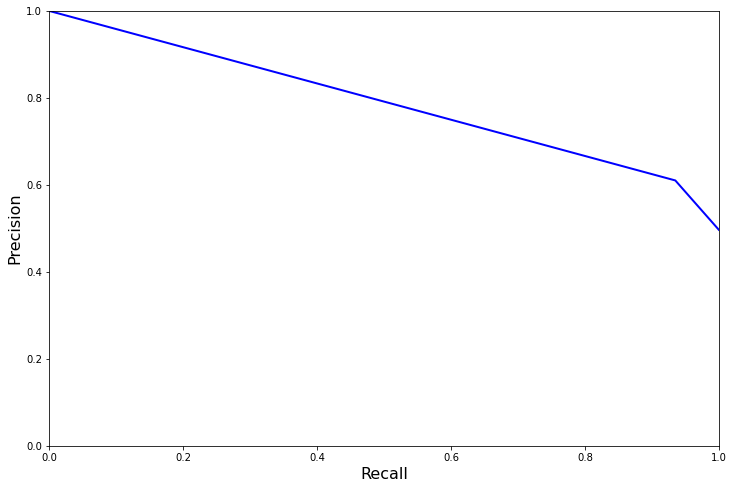

In [371]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(12, 8))
plot_precision_vs_recall(precisions, recalls)
# save_fig("precision_vs_recall_plot")
plt.show()

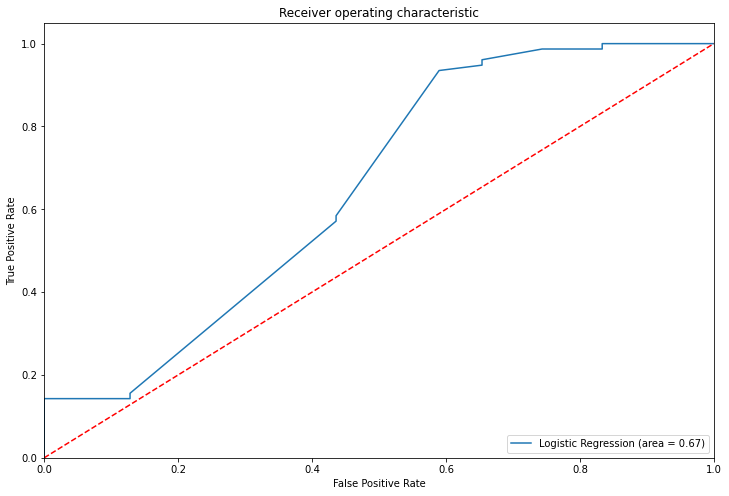

In [372]:
# ROC AUC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Let's try SGDClassifier to see can it do better than logreg

In [374]:


from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=42)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(sgd_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.47


In [375]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.50833333, 0.48333333, 0.51260504])

### Let's try PARFIT on Log Reg and SGDClassifier

In [382]:
!pip install parfit

  Created wheel for parfit: filename=parfit-0.220-py3-none-any.whl size=8660 sha256=01aca07f9a3dfb065c5654b5c7ecee025cf7890dc0a028a839d50f4814181e6a
  Stored in directory: /Users/markouskokovic/Library/Caches/pip/wheels/71/ce/ff/5bee3f34f7544130528c250644c041c8eecbafcee5a572acb4
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=f36681d061a1af0d4d2261a10bdb10ceeacb1d52477dd1a8617a52314b11d796
  Stored in directory: /Users/markouskokovic/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built parfit sklearn


-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0242s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


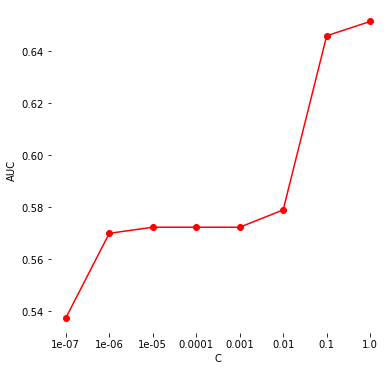

LogisticRegression(n_jobs=-1) 0.6515202138322753


In [392]:
# log reg

from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = \
pf.bestFit(LogisticRegression, paramGrid, 
     X_train, y_train, X_test, y_test, 
     metric=roc_auc_score, scoreLabel='AUC')
print(bestModel, bestScore)

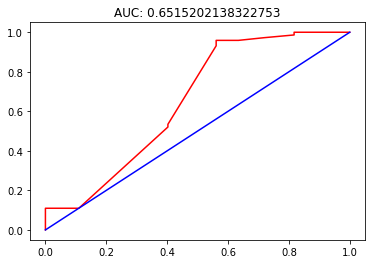

In [393]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(actual, preds):
    fpr, tpr, thresholds = roc_curve(actual, preds[:,1])
    plt.plot(fpr, tpr,'r')
    plt.plot([0,1],[0,1],'b')
    plt.title('AUC: {}'.format(auc(fpr,tpr)))
    plt.show()
    
plot_roc_auc(y_test, bestModel.predict_proba(X_test))

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    2.7s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    2.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    2.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


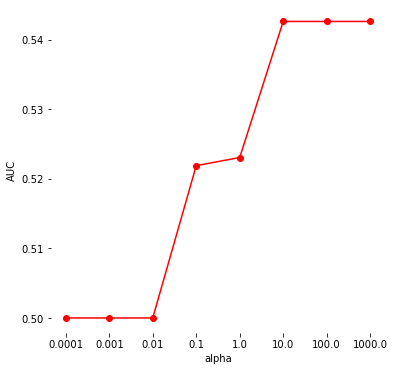

SGDClassifier(alpha=10.0, loss='log', n_jobs=-1) 0.5425993985967257


In [397]:
# SGD

from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = \
pf.bestFit(SGDClassifier, paramGrid,
           X_train, y_train, X_test, y_test, 
           metric = roc_auc_score,
           scoreLabel = "AUC")

print(bestModel, bestScore)

In [519]:
data.to_csv(r'\Users\markouskokovic\desktop\528H13.csv')